In [1]:
import numpy as np
import matplotlib.pyplot as plt
from parameters_insertion import inserted, t_ins, t_wd, insert_duration

In [2]:
# plotting style 
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "monospace"

# Set a professional color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

tls = 22
# Function to update the style of each axis
def update_axis_style(ax, title = '', x_label='', y_label='', x_ticks=True, y_scale='linear'):
    ax.set_title(title,fontsize=tls)
    ax.set_xlabel(x_label,fontsize=tls)
    ax.set_ylabel(y_label,fontsize=tls)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(axis='x', which='both', bottom=x_ticks, top=False, labelbottom=x_ticks,labelsize=tls)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True,labelsize=tls)
    ax.set_yscale(y_scale)

lw = 3

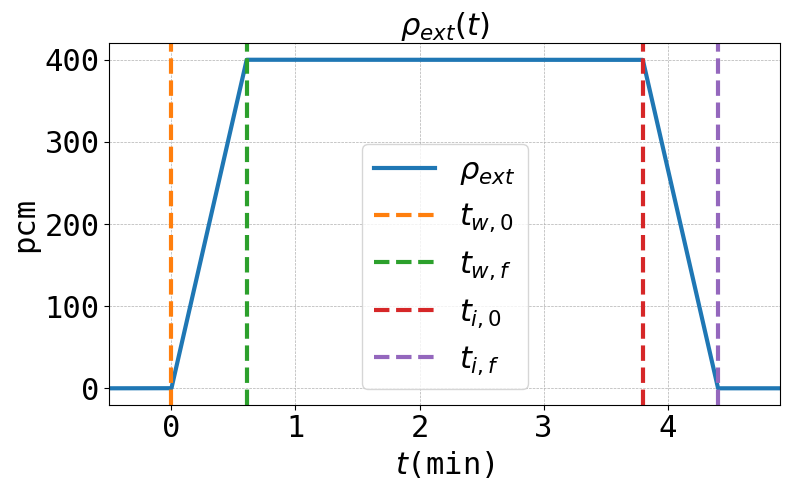

In [3]:
# generate data 
def rho_ext(t):
    if t <= t_ins:
        rho = 0.0
    elif t <= t_ins + insert_duration:
        rho = ((t-t_ins))*(11)
    elif t <= t_wd:
        rho = 400
    elif t <= t_wd + insert_duration:
        rho = 400 - (11)*(t-t_wd)
    else:
        rho = 0.0
    return rho*(1e-5) 

T = np.arange(0.0,1000.0,0.01)
rho_dat = np.array([rho_ext(t) for t in T])

fig, ax = plt.subplots(figsize = (8,5))
update_axis_style(ax, title = r"$\rho_{ext}(t)$")
ax.plot(T/60-5.0, rho_dat*(1e5),label = r'$\rho_{ext}$', linewidth = lw)
ax.axvline(x = 0.0, label = r'$t_{w,0}$', color = colors[1], linestyle = '--', linewidth = lw)
ax.axvline(x = 0.0 + insert_duration/60, label = r'$t_{w,f}$', color = colors[2], linestyle = '--', linewidth = lw)
ax.axvline(x = t_wd/60.0 - 5.0, label = r'$t_{i,0}$', color = colors[3], linestyle = '--', linewidth = lw)
ax.axvline(x = t_wd/60.0 - 5.0 + insert_duration/60, label = r'$t_{i,f}$', color = colors[4], linestyle = '--', linewidth = lw)
ax.set_xlim([-.5, t_wd/60 - 5.0 + insert_duration/60 + 0.5])
ax.set_ylabel('pcm')
ax.set_xlabel(r'$t$(min)')
ax.legend(fontsize = tls)
fig.tight_layout()

